## Part of the code for MSc dissertation

## load data


In [1]:
# import some libraries for question 1
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# read data

c13k= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/c13k.csv') # read counts
c13k_problems = pd.read_json("/content/drive/MyDrive/Colab Notebooks/c13k_problems.json", orient='index')

In [4]:

# change feedback and Amb to 0 and 1
filtered_indices = c13k[(c13k['Feedback'] == True) & (c13k['Amb'] == False)].index.tolist()

In [5]:

filtered_c13k_problems = c13k_problems.loc[filtered_indices].copy()
filtered_c13k_problems.reset_index(drop=True, inplace=True)

In [6]:
dfp=filtered_c13k_problems.copy()
df=filtered_c13k_problems.copy()
dfev=filtered_c13k_problems.copy()

In [ ]:
# Modify column 'B' to have a maximum of 9 lists
for i, row in dfp.iterrows():
    b_lists = row['B']
    while len(b_lists) < 9:
        b_lists.append([0, 0])

# Create new DataFrame with the modified column 'B'
new_df = pd.DataFrame({'A': dfp['A'], 'B': dfp['B']})

# Display the new DataFrame
print(new_df)

dfn = pd.DataFrame()

# split lists in 'A' into two lists: one for probabilities and one for values
dfn['PA'] = [[i[0] for i in sublist] for sublist in new_df['A']]
dfn['VA'] = [[i[1] for i in sublist] for sublist in new_df['A']]

# split lists in 'B' into two lists: one for probabilities and one for values
dfn['PB'] = [[i[0] for i in sublist] for sublist in new_df['B']]
dfn['VB'] = [[i[1] for i in sublist] for sublist in new_df['B']]



## round to 0.01

In [8]:


# Helper function to round the values and handle values between 0 and 1
def round_values(value):
    if isinstance(value, list):
        return [round_values(subvalue) for subvalue in value]
    elif isinstance(value, (int, float)):
        # If value is between 0 and 1, round it to the closest value in the specified list
        if 0 < value < 1:
            closest_value = round(value, 2)
            return closest_value
        else:
            # Round to integer if value is larger than 1 or smaller than 0
            if value >= 1:
                return round(value)
            elif value <= 0:
                return round(value)
            else:
                return round(value, 3)
    else:
        return value

# Apply the helper function to format the values
dfp = dfp.applymap(round_values)

In [ ]:

# Create new DataFrame with modified column names
new_columns = []
new_data = []

# Modify column 'A'
for i, row in dfp.iterrows():
    a_lists = row['A']
    a_p1, a_v1 = a_lists[0][0], a_lists[0][1]
    a_p2, a_v2 = a_lists[1][0], a_lists[1][1]
    new_row = [a_p1, a_v1, a_p2, a_v2]
    new_data.append(new_row)
# Modify column 'B'
for i, row in dfp.iterrows():
    b_lists = row['B']
    b_p1, b_v1 = b_lists[0][0], b_lists[0][1]
    b_p2, b_v2 = b_lists[1][0], b_lists[1][1]
    b_p3, b_v3 = b_lists[2][0], b_lists[2][1]
    b_p4, b_v4 = b_lists[3][0], b_lists[3][1]
    b_p5, b_v5 = b_lists[4][0], b_lists[4][1]
    b_p6, b_v6 = b_lists[5][0], b_lists[5][1]
    b_p7, b_v7 = b_lists[6][0], b_lists[6][1]
    b_p8, b_v8 = b_lists[7][0], b_lists[7][1]
    b_p9, b_v9 = b_lists[8][0], b_lists[8][1]
    new_data[i].extend([b_p1, b_v1, b_p2, b_v2, b_p3, b_v3, b_p4, b_v4, b_p5, b_v5, b_p6, b_v6, b_p7, b_v7, b_p8, b_v8, b_p9, b_v9])

# Create new DataFrame with modified column names
new_columns.extend(['PA1', 'VA1', 'PA2', 'VA2'])
new_columns.extend(['PB1', 'VB1', 'PB2', 'VB2', 'PB3', 'VB3', 'PB4', 'VB4', 'PB5', 'VB5', 'PB6', 'VB6', 'PB7', 'VB7', 'PB8', 'VB8', 'PB9', 'VB9'])

df2 = pd.DataFrame(new_data, columns=new_columns)

# Display the new DataFrame
print(df2)

In [ ]:




# Calculate the maximum number of lists in column 'A'
max_lists_A = filtered_c13k_problems['A'].apply(lambda x: len(x)).max()

# Calculate the maximum number of lists in column 'B'
max_lists_B = filtered_c13k_problems['B'].apply(lambda x: len(x)).max()

print("Maximum number of lists in column A:", max_lists_A)
print("Maximum number of lists in column B:", max_lists_B)

In [11]:
c13k['Feedback'] = c13k['Feedback'].astype(int)
c13k['Amb'] = c13k['Amb'].astype(int)

c13k = c13k.drop('n', axis=1)

filtered_c13k = c13k.loc[filtered_indices].copy()
# Resetting the index of filtered_c13k_problems
filtered_c13k.reset_index(drop=True, inplace=True)

df=filtered_c13k.copy()


### update dataset

In [12]:

Y0=df['bRate']

X = df2

X.columns



Index(['PA1', 'VA1', 'PA2', 'VA2', 'PB1', 'VB1', 'PB2', 'VB2', 'PB3', 'VB3',
       'PB4', 'VB4', 'PB5', 'VB5', 'PB6', 'VB6', 'PB7', 'VB7', 'PB8', 'VB8',
       'PB9', 'VB9'],
      dtype='object')

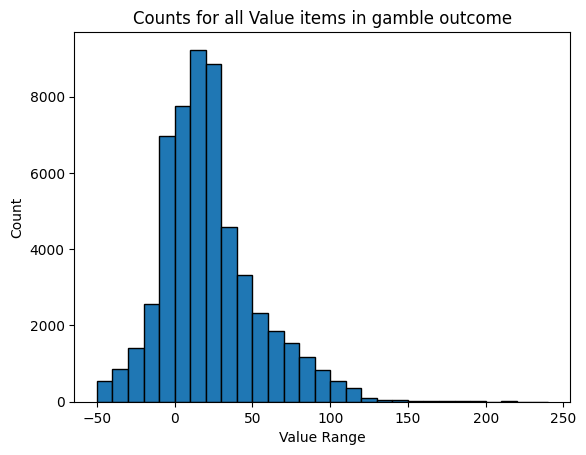

In [13]:

## Distribution for value
import matplotlib.pyplot as plt

# List of columns to concatenate
columns_to_concat = ['VA1', 'VA2', 'VB1', 'VB2', 'VB3', 'VB4', 'VB5', 'VB6', 'VB7', 'VB8', 'VB9']

# Concatenate columns and store in a list
concatenated_list = X[columns_to_concat].values.ravel().tolist()

concatenated_list= [value for value in concatenated_list if value != 0]




# Define the bins and their boundaries
bins = range(-50, 250, 10)  # Adding 11 to include the last bin's upper boundary

# Create the histogram
plt.hist(concatenated_list, bins=bins, edgecolor='black')

# Set plot labels and title
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Counts for all Value items in gamble outcome')

# Show the plot
plt.show()






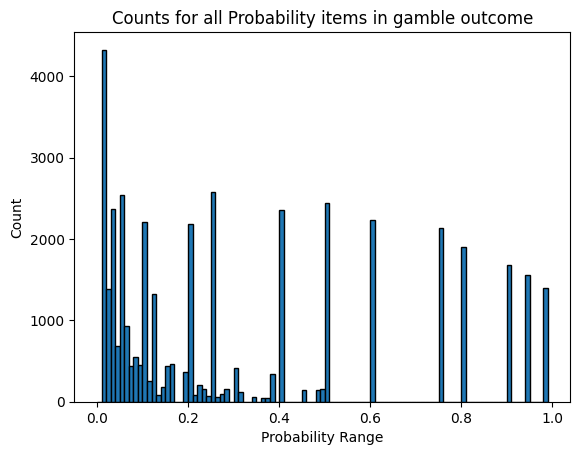

In [14]:
## distribution for probability
columns_to_concat = ['PA1', 'PA2', 'PB1', 'PB2', 'PB3', 'PB4', 'PB5', 'PB6', 'PB7', 'PB8', 'PB9']


# Concatenate columns and store in a list
concatenated_list = X[columns_to_concat].values.ravel().tolist()

concatenated_list= [value for value in concatenated_list if value != 0]



bins = [i * 0.01 for i in range(100)]  # Bin edges from 0 to 1 in steps of 0.1

# Create the histogram
plt.hist(concatenated_list, bins=bins, edgecolor='black')

# Set plot labels and title
plt.xlabel('Probability Range')
plt.ylabel('Count')
plt.title('Counts for all Probability items in gamble outcome')

# Show the plot
plt.show()







## Dictionary

In [15]:




# List of columns to replace values in
columns_to_replace = ['VA1', 'VA2', 'VB1', 'VB2', 'VB3', 'VB4', 'VB5', 'VB6', 'VB7', 'VB8', 'VB9']

# Replace value 1 with 1.01 in specified columns
X[columns_to_replace] = X[columns_to_replace].replace(1, 1.01)





In [16]:

import numpy as np

# Create a copy of X as X1
X1 = X.copy()

# Create a list to store all unique values
unique_values_list = []

# Iterate over each column and collect unique values
for column in X1.columns:
    unique_values = X1[column].unique().tolist()
    unique_values_list.extend(unique_values)

# Get unique values from the list and assign indices
unique_values = list(set(unique_values_list))
indices = list(range(len(unique_values)))

# Create a dictionary to store unique values and indices
unique_values_dict = dict(zip(unique_values, indices))

len(unique_values_dict)




302

In [ ]:

# Replace values in X1 with dictionary values
X1 = X1.replace(unique_values_dict)

# Check for missing values
has_missing_values = X1.isna().any().any()

# Print the updated DataFrame and the result of missing values check
print(X1)
print("Missing Values:", has_missing_values)


In [20]:




# Convert the DataFrame to a matrix
matrix = X1.values

# Print the matrix
print(matrix)
X2=matrix


[[  0.  26. 245. ...  34.  34.  34.]
 [  1.   6.   1. ...  34.  34.  34.]
 [245.  37.   0. ...  34.  34.  34.]
 ...
 [  1.  70.   1. ...  34.  34.  34.]
 [220.   8. 222. ...  34.  34.  34.]
 [  1.  89.   1. ...  34.  34.  34.]]


In [ ]:


# Define the dimensions of the empty matrix
num_items = 302
vector_size = 1

# Create the empty matrix
embedding_matrix = np.zeros((num_items, vector_size))

# Print the embedding matrix
print(embedding_matrix)


## Set prior

In [22]:
import numpy as np

# Define the dimensions of the empty matrix
num_items = 302
vector_size = 1

# Create the empty matrix
embedding_matrix = np.zeros((num_items, vector_size))
for i in range(num_items):
    key = list(unique_values_dict.keys())[i]

    embedding_matrix[i] = key







## neural network

In [23]:
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
# cnn tensor
import torch
from torch.utils.data import DataLoader, TensorDataset
# cnn
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
import torchvision.models as models
# report
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## EV


In [24]:
import numpy as np
Xev=filtered_c13k_problems.copy()
XA=Xev['A'].values
XB=Xev['B'].values

# Calculate VA and VB for each trainX[i]
VA = [sum(a * b for a, b in sublist) for sublist in XA]
VB = [sum(a * b for a, b in sublist) for sublist in XB]

VA_array = np.array(VA)
VB_array = np.array(VB)

# Calculate gap using numpy array operations
gap = np.exp(-0.2 * (VA_array - VB_array))

# Calculate trainY1 according to the formula
Y1 = 1 / (1 + gap)
# Y1 = VA / (VA + VB)
print(Y1)






[0.67040116 0.5        0.89934791 ... 0.41095957 0.549834   0.66818777]


In [25]:
# New

def get_data_loader(X_input,Y_input,Y2_input,batch_size):
  batch_size=batch_size
  # Split the data into training and testing sets
  trainX, testX, trainY, testY, trainY2, testY2 = train_test_split(X_input, Y_input, Y2_input, test_size=0.1, random_state=42)
  trainX = np.array(trainX).astype(np.float32)
  testX = np.array(testX).astype(np.float32)

  # Convert X_train and Xtest to tensors
  Xtrain = torch.from_numpy(trainX)

  Xtest = torch.from_numpy(testX)
  # Convert Y_train and Ytest to tensors
  Y_train = trainY.tolist()
  Y_train_ev=trainY2.tolist()

  Y_test=testY.tolist()
  Y_test_ev=testY2.tolist()

  Ytrain = torch.tensor(Y_train, dtype=torch.float)
  Ytest = torch.tensor(Y_test, dtype=torch.float)
  Ytrain_ev = torch.tensor(Y_train_ev, dtype=torch.float)
  Ytest_ev = torch.tensor(Y_test_ev, dtype=torch.float)


  # Create a DataLoader for the training and dev data
  train_data= TensorDataset(Xtrain, Ytrain)
  train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
  test_data=TensorDataset(Xtest, Ytest)
  test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
  # create loader for ev
  train_data_ev= TensorDataset(Xtrain, Ytrain_ev)
  train_loader_ev = DataLoader(train_data_ev, batch_size=batch_size, shuffle=True)
  test_data_ev=TensorDataset(Xtest, Ytest_ev)
  test_loader_ev = DataLoader(test_data_ev, batch_size=batch_size, shuffle=True)
  return train_loader,test_loader,train_loader_ev,test_loader_ev


## data splitter


In [26]:
def split_lists(X, Y, Y1):
    total_length = len(X)
    step_size = total_length // 10  # Split into 10 parts

    X_list = []
    Y_list = []
    Y1_list = []

    for i in range(1, 11):
        end_index = i * step_size
        X_list.append(X[:end_index])
        Y_list.append(Y[:end_index])
        Y1_list.append(Y1[:end_index])

    return X_list, Y_list, Y1_list

# Sample lists


X_list, Y_list, Y1_list = split_lists(X2, Y0, Y1)
X_list[9], Y_list[9], Y1_list[9]=X2,Y0,Y1


In [27]:
len(X_list[9])

9831

## get data_loader


In [29]:
X=X2
Y=Y0
Y1=Y1

In [30]:
train_loader1,test_loader1,train_loader_ev1,test_loader_ev1=get_data_loader(X,Y,Y1,32)
train_loader2,test_loader2,train_loader_ev2,test_loader_ev2=get_data_loader(X,Y,Y1,32)
train_loader3,test_loader3,train_loader_ev3,test_loader_ev3=get_data_loader(X,Y,Y1,32)
train_loader4,test_loader4,train_loader_ev4,test_loader_ev4=get_data_loader(X,Y,Y1,32)
train_loader5,test_loader5,train_loader_ev5,test_loader_ev5=get_data_loader(X,Y,Y1,32)

## NN


In [31]:
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
# cnn tensor
import torch
from torch.utils.data import DataLoader, TensorDataset
# cnn
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
import torchvision.models as models
# report
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [32]:
# LSTM
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# decay learning rate
import torch.optim.lr_scheduler as lr_scheduler
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot as plt
#get word index
import collections
# for attention
import torch.nn.functional as F
# for evaluation
from sklearn.metrics import f1_score
# for he initialization
import torch.nn.init as init
import math


In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## LSTm Adjust this to get different model for example embedding 1/20 with/without embedding prior

In [ ]:
import numpy as np

# Define the dimensions of the empty matrix
num_items = 302
vector_size = 1

# Create the empty matrix
embedding_matrix = np.zeros((num_items, vector_size))

# Print the embedding matrix
print(embedding_matrix)

### set prior if choose this

In [35]:
import numpy as np

# Define the dimensions of the empty matrix
num_items = 302
vector_size = 1

# Create the empty matrix
embedding_matrix = np.zeros((num_items, vector_size))
for i in range(num_items):
    key = list(unique_values_dict.keys())[i]

    embedding_matrix[i] = key





# Print the embedding matrix
print(embedding_matrix)

[[ 9.50e-01]
 [ 5.00e-01]
 [ 2.50e-01]
 [ 1.00e+00]
 [ 9.90e-01]
 [ 7.50e-01]
 [ 2.00e+00]
 [ 6.00e+00]
 [ 8.00e+00]
 [ 9.00e+00]
 [ 7.00e+00]
 [ 1.10e+01]
 [ 1.20e+01]
 [ 1.30e+01]
 [ 1.40e+01]
 [ 1.50e+01]
 [ 1.00e+01]
 [ 1.70e+01]
 [ 1.80e+01]
 [ 1.90e+01]
 [ 1.60e+01]
 [ 2.10e+01]
 [ 2.20e+01]
 [ 2.30e+01]
 [ 2.40e+01]
 [ 2.50e+01]
 [ 2.60e+01]
 [ 2.70e+01]
 [ 5.00e+00]
 [ 2.90e+01]
 [ 3.00e+01]
 [ 3.10e+01]
 [ 3.20e+01]
 [ 3.30e+01]
 [ 0.00e+00]
 [ 3.50e+01]
 [ 3.60e+01]
 [ 3.70e+01]
 [ 3.80e+01]
 [ 3.90e+01]
 [ 4.00e+01]
 [ 4.10e+01]
 [ 4.20e+01]
 [ 4.30e+01]
 [ 4.40e+01]
 [ 4.50e+01]
 [ 4.60e+01]
 [ 4.70e+01]
 [ 4.80e+01]
 [ 4.90e+01]
 [ 5.00e+01]
 [ 5.10e+01]
 [ 5.20e+01]
 [ 5.30e+01]
 [ 5.40e+01]
 [ 5.50e+01]
 [ 5.60e+01]
 [ 5.70e+01]
 [ 5.80e+01]
 [ 5.90e+01]
 [ 6.00e+01]
 [ 6.10e+01]
 [ 6.20e+01]
 [ 6.30e+01]
 [ 6.40e+01]
 [ 6.50e+01]
 [ 6.60e+01]
 [ 6.70e+01]
 [ 6.80e+01]
 [ 6.90e+01]
 [ 7.00e+01]
 [ 7.10e+01]
 [ 7.20e+01]
 [ 7.30e+01]
 [ 7.40e+01]
 [ 7.50e+01]
 [ 7.60e+01]

### LSTM


In [36]:
num_value = 302
embedding_dim = 1

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.embedding = nn.Embedding(num_value, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = True
        # self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_dim, 64, batch_first=True, bidirectional=True)
        self.attention = nn.Sequential(nn.Linear(128, 64),
                                       nn.Tanh(),
                                       nn.Linear(64, 1))
        self.dropout = nn.Dropout(p=0.2)
        self.fc = nn.Sequential(nn.Linear(128, 32),
                                nn.PReLU(),
                                nn.Dropout(p=0.5),
                                nn.Linear(32, 1),
                                nn.Sigmoid())  # Change to Sigmoid activation for output

        # Random initializer
        nn.init.xavier_uniform_(self.lstm.weight_ih_l0)
        nn.init.xavier_uniform_(self.lstm.weight_hh_l0)
        nn.init.xavier_uniform_(self.lstm.weight_ih_l0_reverse)
        nn.init.xavier_uniform_(self.lstm.weight_hh_l0_reverse)

    def forward(self, x):
        x = x.long().to(device)    # Convert x to Long type
        embeddings = self.embedding(x)
        h0 = nn.init.xavier_uniform_(torch.zeros(2, len(x), 64)).to(device)  # Move hidden tensor to the desired device
        c0 = nn.init.xavier_uniform_(torch.zeros(2, len(x), 64)).to(device)
        output, (h0, c0) = self.lstm(embeddings, (h0, c0))

        # apply attention
        attn_weights = self.attention(output)
        attn_weights = F.softmax(attn_weights, dim=1)
        attn_output = torch.bmm(output.transpose(1, 2), attn_weights).squeeze(2)

        attn_output = self.dropout(attn_output)
        output = self.fc(attn_output)
        return output




In [ ]:
embedding_matrix

## train

In [37]:
def train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model,train_loader):
  model=model.to(device)
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

  scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
  # Training model
  loss_list = []
  epochs = num_epochs
  for epoch in range(epochs):
    model.train()

    training_loss = 0

    for images, labels in train_loader:
        # Zero gradient
        optimizer.zero_grad()

        images=images.to(device)
        labels = labels.to(device)

        labels = labels.to(torch.float32)
        labels = labels.unsqueeze(1)
        outputs = model(images)
        outputs = outputs.to(torch.float32)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        training_loss += loss.item() * images.size(0)
    scheduler.step()
    epoch_loss = training_loss / len(train_loader.dataset)






    loss_list.append(epoch_loss)

    #print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, epoch_loss))

  #plt.plot(loss_list, label='Training Loss')
  #plt.xlabel('Epoch')
  #plt.ylabel('Loss')
  #plt.legend()
  #plt.show()
  return model

In [38]:

def test_evaluate(model,data_loader):
    model=model
    model.eval()  # eval mode (used for test)
    with torch.no_grad():
        y_pred=[]
        y_label=[]
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)


            y_label.extend(labels)
            y_pred.extend(outputs)
        #print(type(y_label[1]),type(y_label[1]))
        y_l= [float(item) for item in y_label]
        y_p= [float(item) for item in y_pred]
        return y_l,y_p




In [39]:
from sklearn.metrics import mean_squared_error

def evaluate_matrix2(model2, dataloader):
    ytrue, ypredict = test_evaluate(model2, dataloader)
    rmse = np.sqrt(mean_squared_error(ytrue, ypredict))
    mse = mean_squared_error(ytrue, ypredict)
    pearson = pearsonr(ytrue, ypredict)[0]
    spearman = spearmanr(ytrue, ypredict)[0]
    r2 = r2_score(ytrue, ypredict)
    print('RMSE of the model images: {:.10f}'.format(rmse))
    print('MSE of the model images: {:.10f}'.format(mse))
    print('Pearson correlation coefficient: {:.2f}'.format(pearson))
    print('Spearman correlation coefficient: {:.2f}'.format(spearman))
    print('R2: {:.2f}'.format(r2))
    # Plot the scatter plot between true and predicted counts for the test data
    plt.scatter(ypredict, ytrue)
    plt.ylabel('True Counts')
    plt.xlabel('Predicted Counts')
    plt.show()
    return rmse, mse, pearson, spearman, r2


In [40]:
def get_mse(model2,dataloader):
  ytrue, ypredict = test_evaluate(model2, dataloader)
  mse = mean_squared_error(ytrue, ypredict)
  return(mse)


## model S_L

In [41]:
import torch

# Assuming you have a trained model named 'model' and you want to save it
# to a file named 'trained_model.pth'
def model_sl(model_s):
  # Assuming your model is named 'model' and you want to save it to 'trained_model.pth'
  torch.save(model_s.state_dict(), '/content/drive/MyDrive/Bayesian/trained_model.pth')

  # To load the saved model back
  model_l=MyModel()
  pretrained_model_path = '/content/drive/MyDrive/Bayesian/trained_model.pth'
  pretrained_dict = torch.load(pretrained_model_path)
  model_dict = model_s.state_dict()

  # Filter out unnecessary keys from the loaded state dictionary
  pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}

  # Load the pretrained weights into the model
  model_dict.update(pretrained_dict)
  model_l.load_state_dict(model_dict)

  # Set the model to training mode
  model_l.train()
  return model_l

## adjust

## 10 different size


In [ ]:
def all_size_mse():

  mean_mse_list=[]
  for i in range(10):
    X=X_list[9]
    Y=Y_list[9]
    Y1=Y1_list[9]

    mse_list=[]
    for j in range(5):
      train_loader,test_loader,train_loader_ev,test_loader_ev=get_data_loader(X,Y,Y1,32)
      modela=MyModel()
      modela.to(device)
      model_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,modela,train_loader)
      mse=get_mse(model_trained,test_loader)
      mse_list.append(mse)

    mean_mse=np.mean(mse_list)
    print('The',i+1 ,'size sample:' ,mse_list,mean_mse)
    mean_mse_list.append(mean_mse)
  return mean_mse_list


In [ ]:
## change MyModel with embedding size 1 for these

In [ ]:
num_epochs = 70 # 50 60 70
batch_size = 32
learning_rate = 0.001  # 0.001 0.01
weight_decay = 0
step_size = 5
gamma = 0.9 #
list_25=all_size_mse()

The 1 size sample: [0.012249170568024059, 0.011160248481039216, 0.011480102744699775, 0.011464126419171746, 0.011650713750892312] 0.01160087239276542
The 2 size sample: [0.011780754651403595, 0.012113772830425739, 0.01057626878469427, 0.011427458080880552, 0.011154863548947515] 0.011410623579270333
The 3 size sample: [0.012038496854684217, 0.011132179402713424, 0.011685538858047134, 0.011765996927928993, 0.011934657284177114] 0.011711373865510176
The 4 size sample: [0.01144648252176984, 0.011127689849847508, 0.011510314263269993, 0.011252847416073243, 0.01160769631663348] 0.011389006073518813
The 5 size sample: [0.011425499774094825, 0.012391094914028353, 0.011504222473924635, 0.012424281486710143, 0.011551534152728365] 0.011859326560297267
The 6 size sample: [0.010985475130670474, 0.011863058487308446, 0.011475260874215215, 0.01194297088586103, 0.010802752386080802] 0.011413903552827193
The 7 size sample: [0.011629721608962931, 0.011457950578821837, 0.01181334606693883, 0.011384503795

In [ ]:
# Parameter for embedding prior and 1-dimension non prior
num_epochs = 70
batch_size = 32
learning_rate = 0.01  # Change the learning rate to 0.001
weight_decay = 0
step_size = 5
gamma = 0.7

list_1_non=all_size_mse()

KeyboardInterrupt: ignored

In [ ]:
list_1_non

[0.07740923243997669,
 0.05911901401034077,
 0.03940048775246611,
 0.03720618667561337,
 0.024553971768181505,
 0.019890401974964007,
 0.016793294848078056,
 0.014227953325303605,
 0.013805858135383283,
 0.013389653554164396]

In [ ]:
num_epochs = 70
batch_size = 32
learning_rate = 0.01  # Change the learning rate to 0.001
weight_decay = 0
step_size = 5
gamma = 0.5

list_1_embed=all_size_mse()

The 1 size sample: [0.0392044758339456, 0.035748908664371574, 0.03514309246296427, 0.0354558236598128, 0.03433841533318891] 0.03597814319085663
The 2 size sample: [0.024538910093007904, 0.028347201406536657, 0.025508037227628386, 0.025979953782067588, 0.02294822746393264] 0.025464465994634634
The 3 size sample: [0.017488651572552086, 0.01566119999141084, 0.016173694518007566, 0.018844367960756146, 0.01812894575877058] 0.017259371960299443
The 4 size sample: [0.01655254473295498, 0.01701811120049761, 0.016335717707214096, 0.017431773304587995, 0.015872728518635942] 0.016642175092778124
The 5 size sample: [0.012691292139936425, 0.014797114957144595, 0.015955250297103967, 0.013684363552788141, 0.014449791724634543] 0.014315562534321535
The 6 size sample: [0.013367274849297905, 0.013546330166889263, 0.014856853958791893, 0.014373737577355985, 0.013238561265607655] 0.013876551563588541
The 7 size sample: [0.013110282552577969, 0.011686601094298766, 0.01320090711311776, 0.0122460836636852, 0

In [ ]:
list_1_embed

[0.03597814319085663,
 0.025464465994634634,
 0.017259371960299443,
 0.016642175092778124,
 0.014315562534321535,
 0.013876551563588541,
 0.012596488153926102,
 0.012445433270454071,
 0.012100723729768847,
 0.012023353183990962]

## model for prior

In [ ]:
def all_size_mse2():

  mean_mse_list=[]
  for i in range(10):
    X=X_list[i]
    Y=Y_list[i]
    Y1=Y1_list[i]

    mse_list=[]
    for j in range(5):
      train_loader,test_loader,train_loader_ev,test_loader_ev=get_data_loader(X,Y,Y1,32)
      model_eva=MyModel()
      model_eva.to(device)
      model_evatrained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model_eva,train_loader_ev)
      modela=model_sl(model_eva)
      modela.to(device)
      model_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,modela,train_loader)
      mse=get_mse(model_trained,test_loader)
      mse_list.append(mse)

    mean_mse=np.mean(mse_list)
    print('The',i+1 ,'size sample:' ,mse_list,mean_mse)
    mean_mse_list.append(mean_mse)
  return mean_mse_list

In [ ]:
# Parameter for embedding prior and 1-dimension non prior
num_epochs = 70
batch_size = 32
learning_rate = 0.001  # Change the learning rate to 0.001
weight_decay = 0
step_size = 5
gamma = 0.8

list_1_prior=all_size_mse2()

The 1 size sample: [0.06707917841264319, 0.0647405186338766, 0.05923492105215542, 0.06464092555245786, 0.0631059604040095] 0.06376030081102851
The 2 size sample: [0.05064818988590565, 0.0507609593852692, 0.04829918566053006, 0.05220240489867083, 0.049938925756718155] 0.050369933117418775
The 3 size sample: [0.03844658838624547, 0.034906845566430915, 0.03380089137573824, 0.030192629740602658, 0.03285998738642895] 0.034041388491089244
The 4 size sample: [0.03643737482474389, 0.03955612436170935, 0.03358860966791692, 0.03929873792646736, 0.038575332679149456] 0.03749123589199739
The 5 size sample: [0.029736777089051356, 0.03276040612124319, 0.03928589670814565, 0.030730345101735192, 0.033708638206899295] 0.03324441264541493
The 6 size sample: [0.033292872935668794, 0.02834035331359743, 0.033994117332105285, 0.0278726648035581, 0.028380715443627746] 0.03037614476571147
The 7 size sample: [0.024091628965513794, 0.015358298283309093, 0.020342290321893275, 0.02810207115917998, 0.0151729296228

In [ ]:
list_1_prior

[0.06376030081102851,
 0.050369933117418775,
 0.034041388491089244,
 0.03749123589199739,
 0.03324441264541493,
 0.03037614476571147,
 0.020613443670544254,
 0.017143395090771455,
 0.014924007426538474,
 0.014200274114099892]

In [ ]:
## Change Mymodel with embedding size 20 for these

In [ ]:
# Parameter Set 1 for  2 kinds of  20 dimension and 1-dimension with EV prior
num_epochs = 60
batch_size = 32
learning_rate = 0.001  # Change the learning rate to 0.001
weight_decay = 0
step_size = 5
gamma = 0.9
# list_20_prior=all_size_mse2()

In [ ]:
list_20_non=all_size_mse()

## Single model and test for embedding

In [42]:
# Parameter Set 1 for  2 kinds of  20 dimension and 1-dimension with EV prior
num_epochs = 60
batch_size = 32
learning_rate = 0.001  # Change the learning rate to 0.001
weight_decay = 0
step_size = 5
gamma = 0.9

In [ ]:
def all_size_mse():

  mean_mse_list=[]
  for i in range(10):
    X=X_list[9]
    Y=Y_list[9]
    Y1=Y1_list[9]

    mse_list=[]
    for j in range(5):
      train_loader,test_loader,train_loader_ev,test_loader_ev=get_data_loader(X,Y,Y1,32)
      modela=MyModel()
      modela.to(device)
      model_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,modela,train_loader)
      mse=get_mse(model_trained,test_loader)
      mse_list.append(mse)

    mean_mse=np.mean(mse_list)
    print('The',i+1 ,'size sample:' ,mse_list,mean_mse)
    mean_mse_list.append(mean_mse)
  return mean_mse_list

In [ ]:


model = MyModel()
model.to(device)






MyModel(
  (embedding): Embedding(302, 1)
  (lstm): LSTM(1, 64, batch_first=True, bidirectional=True)
  (attention): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

## With prior

In [ ]:
model1_ev=MyModel()
model1_ev.to(device)
model1_evtrained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1_ev,train_loader_ev1)

In [ ]:

model1=model_sl(model1_ev)
model1.to(device)
model1_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader1)

In [ ]:
# model2 ev
model2_ev=MyModel()
model2_ev.to(device)
model2_evtrained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model2_ev,train_loader_ev2)
# model2 load
model2 = model_sl(model2_ev)
model2.to(device)
model2_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model2,train_loader2)
# model3 ev
model3_ev=MyModel()
model3_ev.to(device)
model3_evtrained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model3_ev,train_loader_ev3)
#model3 load
model3 = model_sl(model3_ev)
model3.to(device)
model3_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model3,train_loader3)
#model4 ev
model4_ev=MyModel()
model4_ev.to(device)
model4_evtrained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model4_ev,train_loader_ev4)
#model4 load
model4 = model_sl(model4_ev)
model4.to(device)
model4_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model4,train_loader4)
#model5_ev
model5_ev= MyModel()
model5_ev.to(device)
model5_evtrained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model5_ev,train_loader_ev5)
#model5 load
model5 = model_sl(model5_ev)
model5.to(device)
model5_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model5,train_loader5)

## Model with no prior

In [ ]:
num_epochs = 75 # 50 60 70
batch_size = 32
learning_rate = 0.001  # 0.001 0.01
weight_decay = 0
step_size = 5
gamma = 0.9 #

In [ ]:
model1=MyModel()

model1.to(device)

model1_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader1)

In [ ]:
 # model 2
model2 = MyModel()
model2.to(device)
model2_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model2,train_loader2)

In [ ]:
# model 2
model2 = MyModel()
model2.to(device)
model2_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model2,train_loader2)
#model 3
model3 = MyModel()
model3.to(device)
model3_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model3,train_loader3)
#model 4
model4 = MyModel()
model4.to(device)
model4_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model4,train_loader4)
#model 5
model5 = MyModel()
model5.to(device)
model5_trained=train_model(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model5,train_loader5)

## Get results

Results for fold 1(train test) total cell number:
RMSE of the model images: 0.0889404633
MSE of the model images: 0.0079104060
Pearson correlation coefficient: 0.92
Spearman correlation coefficient: 0.91
R2: 0.84


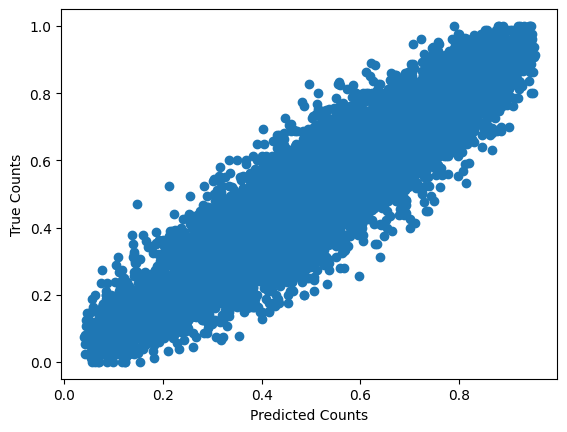

RMSE of the model images: 0.1043548827
MSE of the model images: 0.0108899415
Pearson correlation coefficient: 0.88
Spearman correlation coefficient: 0.87
R2: 0.78


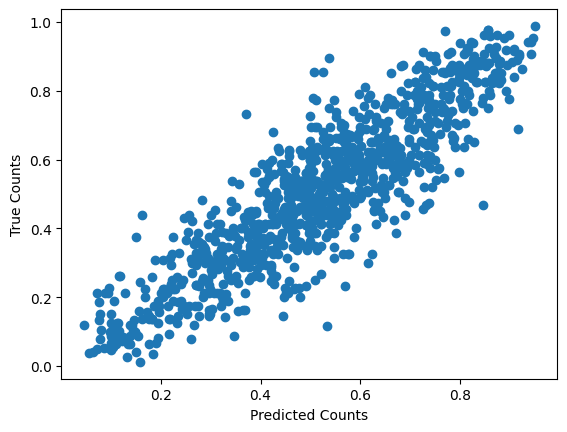

(0.10435488271117521,
 0.010889941545663136,
 0.8847590389840875,
 0.874378194985344,
 0.7807696631495409)

In [ ]:
print( 'Results for fold 1(train test) total cell number:')
evaluate_matrix2(model1_trained,train_loader1)
evaluate_matrix2(model1_trained,test_loader1)

Results for fold 2(train test) total cell number:
RMSE of the model images: 0.0893332371
MSE of the model images: 0.0079804273
Pearson correlation coefficient: 0.92
Spearman correlation coefficient: 0.91
R2: 0.84


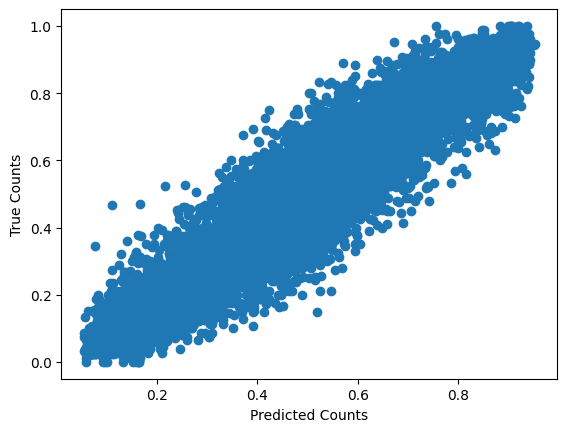

RMSE of the model images: 0.1085913046
MSE of the model images: 0.0117920714
Pearson correlation coefficient: 0.87
Spearman correlation coefficient: 0.87
R2: 0.76


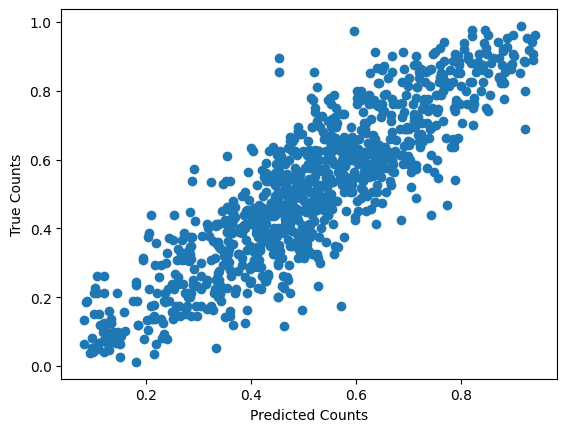

(0.10859130464908108,
 0.011792071445389537,
 0.8735247642475917,
 0.8667548835258698,
 0.7626084782643334)

In [ ]:
print( 'Results for fold 2(train test) total cell number:')
evaluate_matrix2(model2_trained,train_loader2)
evaluate_matrix2(model2_trained,test_loader2)

In [ ]:
print( 'Results for fold 1(train test) total cell number:')

mse1=get_mse(model1_trained,test_loader1)
mse2=get_mse(model2_trained,test_loader2)
mse3=get_mse(model3_trained,test_loader3)
mse4=get_mse(model4_trained,test_loader4)
mse5=get_mse(model5_trained,test_loader5)
mse_list=[mse1,mse2,mse3,mse4,mse5]
mean_mse=np.mean(mse_list)
print(mse_list,mean_mse)

Results for fold 1(train test) total cell number:
[0.011015797428303718, 0.011893980921121665, 0.011145652044379029, 0.011228450285093419, 0.011288549105110115] 0.011314485956801588


In [ ]:
# get the embedding layer
model = model1_trained
# model=model1_evtrained
vector=model.embedding.weight
vector_list1= vector.tolist()
len(vector_list1)

302

In [ ]:
model = model2_trained
vector=model.embedding.weight
vector_list2= vector.tolist()
len(vector_list2)
model = model3_trained
vector=model.embedding.weight
vector_list3= vector.tolist()
len(vector_list3)
model = model4_trained
vector=model.embedding.weight
vector_list4= vector.tolist()
len(vector_list4)
model = model5_trained
vector=model.embedding.weight
vector_list5= vector.tolist()
len(vector_list5)

302

## word vectors


In [ ]:
vector_list=vector_list1

In [ ]:
# Assuming you have a unique_values_dict and transformed_data as NumPy arrays


# Get the keys and values from the dictionary
keys = unique_values_dict.keys()
values = unique_values_dict.values()

# Create a new dictionary to store the updated values
updated_values_dict = {}

# Iterate over the keys and values
for key, value in zip(keys, values):
    # Get the index based on the key
    index = list(keys).index(key)

    # Update the value with the corresponding transformed_data value
    updated_value = vector_list[index]

    # Update the dictionary with the new value
    updated_values_dict[key] = updated_value

# Print the updated dictionary
print("Updated Values Dict:")
print(updated_values_dict)

Updated Values Dict:
{0.95: [-0.3955018222332001, -0.12905113399028778, -0.05288175866007805, -0.07943766564130783, -0.08422000706195831, 0.08449540287256241, -0.032731082290410995, -0.2984502911567688, 0.0829327255487442, 0.08109446614980698, 0.039543747901916504, -0.0776054635643959, -0.22235053777694702, 0.018631592392921448, 0.05697878450155258, -0.0035782542545348406, -0.04248928651213646, 0.01275537721812725, 0.10649064928293228, -0.08137010782957077], 0.5: [-0.10245022177696228, -0.04505559802055359, 0.08382655680179596, 0.007207891903817654, -0.025425123050808907, 0.015053422190248966, -0.008899163454771042, -0.05056801438331604, 0.021356085315346718, 0.06899973750114441, -0.01976083405315876, -0.00603932049125433, -0.12867242097854614, -0.06812161207199097, -0.07301492989063263, 0.02989238128066063, 0.025301694869995117, 0.0643218457698822, -0.004536568187177181, -0.03962394967675209], 0.25: [-0.027509430423378944, -0.03025328740477562, 0.012668134644627571, 0.0448855794966220

In [ ]:
keys_to_filter = keys_to_filter = [key for key, value in unique_values_dict.items() if 0 < key < 1 ]
#keys_to_filter = [key for key, value in unique_values_dict.items() if key <= 0 or 1<key <100]

# keys_to_filter = [key for key in unique_values_dict.keys() if key.startswith('p')]
filtered_dict = {key: updated_values_dict[key] for key in keys_to_filter}


values = np.array(list(filtered_dict.values()))

len(values[1])



20

Updated Filtered Dictionary:
{0.95: array([0.57216321, 0.07405071]), 0.5: array([0.15830969, 0.03378784]), 0.25: array([-0.07984841, -0.05064061]), 0.99: array([0.60254508, 0.03546776]), 0.75: array([0.36633821, 0.02545243]), 0.2: array([-0.15700995,  0.00641023]), 0.45: array([ 0.05369317, -0.07378769]), 0.19: array([-0.03705189, -0.13408484]), 0.23: array([-0.03060834, -0.07810997]), 0.26: array([-0.03076975,  0.36780474]), 0.02: array([-0.13735488, -0.03472972]), 0.16: array([-0.064728  ,  0.07683337]), 0.15: array([0.05936435, 0.0257719 ]), 0.8: array([0.40580675, 0.03934204]), 0.48: array([0.02831008, 0.01338834]), 0.4: array([ 0.07408324, -0.04415691]), 0.9: array([0.47977114, 0.06597473]), 0.6: array([0.20935256, 0.00129838]), 0.12: array([-0.15083336,  0.01395222]), 0.38: array([ 0.06000333, -0.03487658]), 0.37: array([ 0.2853483 , -0.07176266]), 0.36: array([ 0.15726322, -0.07944764]), 0.14: array([-0.18600091, -0.0660515 ]), 0.13: array([ 0.00560848, -0.30150406]), 0.21: arra

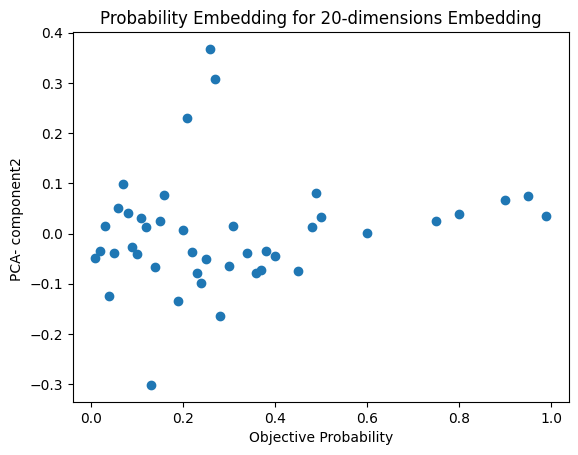

Correlation:  0.16272433121406005
R-squared:  0.026479207969063116


In [ ]:
import numpy as np
from sklearn.decomposition import PCA



# Perform PCA with 2 components
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(values)

# Replace values in filtered_dict with transformed_data
for i, key in enumerate(filtered_dict.keys()):
    filtered_dict[key] = transformed_data[i]

# Print the updated filtered_dict
print("Updated Filtered Dictionary:")
print(filtered_dict)
# Get the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratios
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance):
    print(f"Component {i+1}: {ratio:.2f}")

x = [vector[0] for vector in transformed_data]
filtered_dict.keys()

# Remove 'La' and change to integer
A = [s for s in filtered_dict.keys()]
import matplotlib.pyplot as plt
import numpy as np


# plotting
# y=[vector[0] for vector in filtered_dict.values()]
y=[vector[1] for vector in filtered_dict.values()]
y_negative = [value for value in y]
#x=[vector[1] for vector in filtered_dict.values()]

plt.scatter(A, y_negative)
plt.xlabel('Objective Probability')
plt.ylabel('PCA- component2 ')
plt.title('Probability Embedding for 20-dimensions Embedding')
plt.show()

# correlation
correlation_matrix = np.corrcoef(y_negative, A)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print('Correlation: ', correlation_xy)
print('R-squared: ', r_squared)














